In [1]:
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [5]:
# 1. Laad beide CSV-bestanden
df1 = pd.read_csv("movies.csv")  # Films
df2 = pd.read_csv("tvseries.csv")  # Series

# 2. Voeg een 'type' kolom toe
df1["type"] = "film"
df2["type"] = "serie"

# 3. Voeg beide DataFrames samen
combined = pd.concat([df1, df2])

# 4. Bereken gemiddelde rating per jaar
result = (
    combined.groupby("releaseYear", as_index=False)
    .agg({
        "averageRating": "mean",  # Gemiddelde rating per jaar
        "numVotes": "sum",        # Totale votes per jaar (optioneel)
        "title": lambda x: x.nunique(),  # Aantal unieke titels per jaar
        "type": lambda x: ", ".join(x.unique())  # Unieke types per jaar
    })
    .rename(columns={
        "averageRating": "mean_rating",
        "numVotes": "total_votes",
        "title": "unique_titles_count"
    })
)

# 5. Sla het resultaat op
result.to_csv("combined_stats_by_year.csv", index=False)

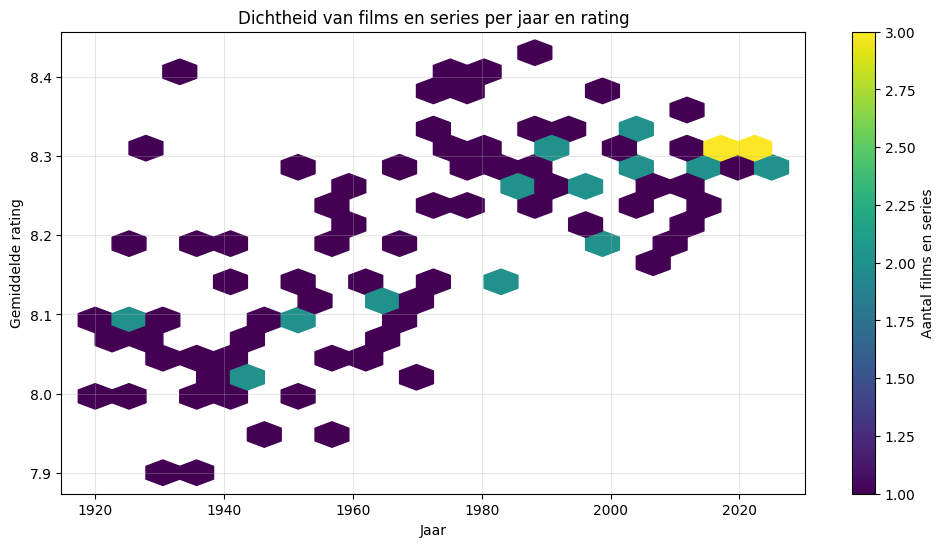

In [16]:
df = pd.read_csv("combined_stats_by_year.csv")

plt.figure(figsize=(12, 6))
plt.hexbin(
    x=df["releaseYear"],
    y=df["mean_rating"],
    gridsize=20,
    cmap="viridis",
    mincnt=1,
    bins=None  # Zorgt voor lineaire schaal
)

plt.colorbar(label="Aantal films en series")
plt.title("Dichtheid van films en series per jaar en rating")
plt.xlabel("Jaar")
plt.ylabel("Gemiddelde rating")
plt.grid(alpha=0.3)
plt.show()
